<a href="https://colab.research.google.com/github/Amogh-S-Acharya/ECOM-CLIENT-/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Step 1: Load the small Advertising dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

# Display first few rows
print(data.head())


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

print(data.columns)


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [3]:
data.columns = data.columns.str.strip()   # removes spaces
print(data.columns)


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [4]:
y = data[data.columns[-1]]  # selects last column (Sales)


Slope (m): 0.0475
Intercept (c): 7.0326


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


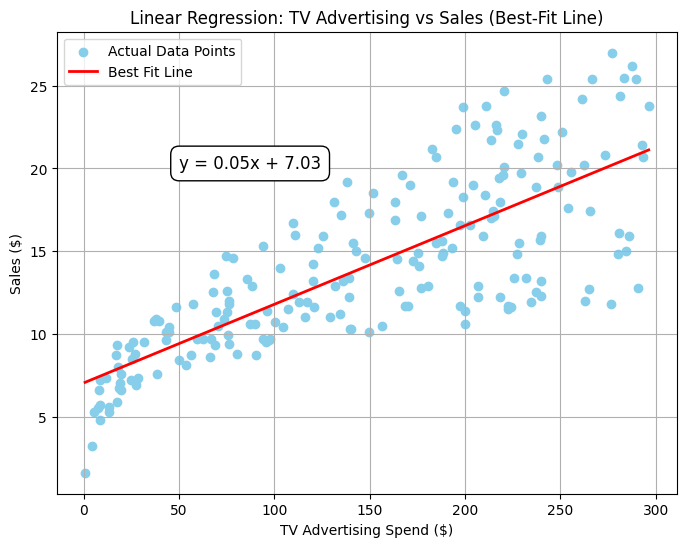

Root Mean Squared Error (RMSE): 3.24
R² Score: 0.61


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

# Step 2: Clean and select data
data.columns = data.columns.str.strip()   # remove extra spaces

X = data[['TV']]                          # feature
y = data[data.columns[-1]]                # target (Sales)

# Step 3: Train the model
model = LinearRegression()
model.fit(X, y)

# Step 4: Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (m): {slope:.4f}")
print(f"Intercept (c): {intercept:.4f}")

# Step 5: Predict for plotting
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# Step 6: Plot scatter + best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='skyblue', label='Actual Data Points')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Best Fit Line')

# Equation text box
plt.text(50, 20, f"y = {slope:.2f}x + {intercept:.2f}", fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title("Linear Regression: TV Advertising vs Sales (Best-Fit Line)")
plt.xlabel("TV Advertising Spend ($)")
plt.ylabel("Sales ($)")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Evaluate performance
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
